<center><img src="img/Marca-ITBA-Color-ALTA.png" width="250">

<h1>Master en Management & Analytics</h1>
</center>

<a id="intro"></a>

## Introducción
El mercado de dispositivos usados y reacondicionados ha crecido considerablemente en la última década, ya que ofrece alternativas rentables tanto a los consumidores como a las empresas que buscan ahorrar dinero a la hora de adquirir uno. Maximizar la longevidad de los dispositivos a través del comercio de segunda mano también reduce su impacto medioambiental y contribuye al reciclaje y a la reducción de residuos.


<a id="pred"></a>
## Predicción del precio de dispositivos usados
Trabajarán con un conjunto de datos de precios de dispositivos reacondicionados / usados. El objetivo es hacer un análisis exploratorio de los datos y aplicar Regresión Lineal para crear un modelo que pueda ayudar en la fijación de precios de tales dispositivos.


<a id="descripcion"></a>
### Descripción del dataset
- device_brand: Nombre de la marca fabricante
- os: Sistema operativo que utiliza el dispositivo
- screen_size: Tamaño de la pantalla en cm
- 4g: Si 4G está disponible o no
- 5g: Si 5G está disponible o no
- front_camera_mp: Resolución de la cámara trasera en megapíxeles
- back_camera_mp: Resolución de la cámara frontal en megapíxeles
- internal_memory: Cantidad de memoria interna (ROM) en GB
- ram: Cantidad de RAM en GB
- battery: Capacidad energética de la batería del dispositivo en mAh
- weight: Peso del dispositivo en gramos
- release_year: Año de lanzamiento del modelo de dispositivo
- days_used: Número de días que se ha utilizado el dispositivo usado/reacondicionado
- normalized_new_price: Precio normalizado de un dispositivo nuevo del mismo modelo
- normalized_used_price (*target*): Precio normalizado del dispositivo usado/reacondicionado


<a id="eda"></a>
### EDA - Exploratory data analysis
Importar el dataset y realizar un análisis exploratorio.
- ¿Cuántos registros hay? 	&#x2714;
- ¿Qué tipo de variable es cada una? 	&#x2714;
- ¿Hay valores faltantes? 	&#x2714;
- ¿Hay valores fuera del rango esperado? ✔
- ¿En qué tipo de dato están almacenados? ✔
- ¿Hay correlación entre las variables? ✔
- ¿En qué rango está cada una? ✔
- ¿Cómo son las proporciones de las variables categóricas? ✔

Realizar las visualizaciones adecuadas para responder estas preguntas.

### Regresión

- Partir los datos en un subset de entrenamiento y uno de testeo. Recuerden siempre aplicar las mismas transformaciones de datos en test que aplicaron en train.
- Preprocesar los datos. ¿Cómo tratarían las variables categóricas? Tengan presente que tal vez resulte conveniente agrupar categorías siguiendo algún criterio para el caso de variables con elevada cantidad de categorías distintas.
- Entrenar una Regresión Lineal
- Evaluar el modelo con la métrica que consideren más adecuada
- ¿Mejoran las métricas utilizando técnicas de regularización Ridge, Lasso o ElasticNet? Optimizar el hiperparámetro de regularización mediante un esquema de cross validation.
- ¿Permiten estas técnicas realizar una selección de variables relevantes?
- Comparar y elegir el mejor modelo entre los candidatos según su score en un dataset de validación
- Reportar la performance del modelo seleccionado en el dataset de testeo

### Reducción de la dimensionalidad

- Utilizar PCA para reducir la dimensionalidad del problema y generar un gráfico en 2 o 3 dimensiones, omitiendo la variable target.
- ¿Se aprecian patrones relevantes que distingan a las observaciones entre sí?
- No olviden estandarizar los datos y focalizarse en las variables cuantitativas.

# **1 - Análisis exploratorio**

In [1]:
#from google.colab import drive
#drive.mount("/content/drive")

In [2]:
#import os
#ruta_csv = "/content/drive/MyDrive/Recursos compartidos Grupo 1/Minería de datos/grupo-7/data/"
#ruta_os = os.chdir(ruta_csv)
#print(os.listdir(ruta_csv))

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.style.use("ggplot")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math
# pd.set_option("max_columns", 200)

nombre_csv = "used_devices.csv"
df = pd.read_csv('data/' + nombre_csv)
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


**¿Cuántos registros hay?**

In [4]:
df.shape

(3454, 15)

A través del atributo "shape" vemos un total de 3454 observaciones, sobre 15 columnas.

**¿Qué tipo de variable es cada una?**

**¿En qué tipo de dato están almacenados?**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Con el método "info" tenemos una descripción breve sobre el nombre de cada variable, el tipo y la cantidad de observaciones no nulas del dataset.
Las variables categóricas son las del tipo "object". Esto es lógico, dado que hacen referencia a la marca, el tipo de sistema operativo y si los celulares poseen o no tecnología 4G o 5G. Las variables del tipo float64 representan valores continuos como la resolucion de la cámara, la capacidad de la batería, peso, etc. Por último los int64 se relacionan con los enteros, a saber, la cantidad de días que se usó el celular y el año de lanzamiento del producto.

**¿Hay valores faltantes?**

La cantidad de observaciones no nulas del dataset aparecen en la segunda columna de la salida del método "df.info()". Aunque también podemos ver la cantidad de nulos y proporción sobre el total de registros.

In [6]:
valores_nulos = [(c, df[c].isnull().sum()) for c in df.columns if df[c].isnull().any()]
df_nulos = pd.DataFrame(valores_nulos, columns=["columna", "cantidad_nulos"])
df_nulos["proporcion_nulos"] = df_nulos["cantidad_nulos"] / len(df)
df_nulos.sort_values(by="cantidad_nulos", ascending=False)


,columna,cantidad_nulos,proporcion_nulos
0,rear_camera_mp,179,0.051824
5,weight,7,0.002027
4,battery,6,0.001737
2,internal_memory,4,0.001158
3,ram,4,0.001158
1,front_camera_mp,2,0.000579


Armamos un dataframe donde podemos ver que el feature "rear_camera_mp" es el más afectado por los valores nulos, con el 5% de los registros. La determinación del plan de acción para los valores se hará más adelante.

**¿Hay valores fuera del rango esperado?**

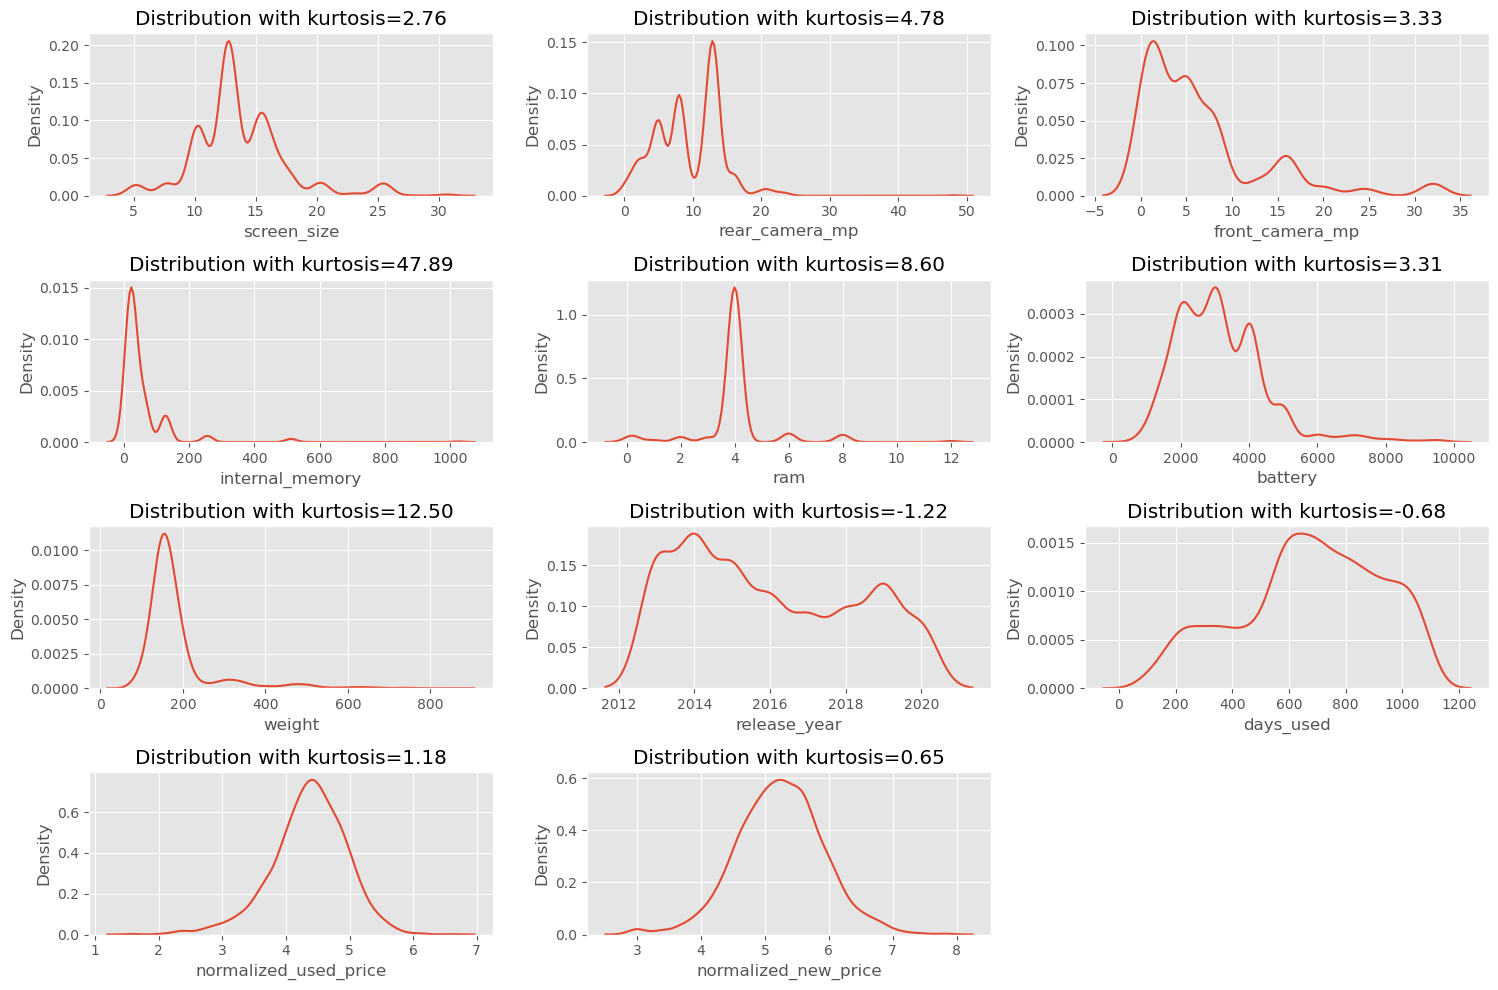

In [7]:
from scipy.stats import kurtosis, kurtosistest, skew

df_categoricas = df.select_dtypes("object")
df_no_categoricas = df.loc[:, [c for c in df.columns if c not in df_categoricas.columns]]
# df_no_categoricas.hist(bins=50, figsize=(15, 10), xlabelsize=6, ylabelsize=6);

fig = plt.figure(figsize=(15, 10))

for i, c in enumerate(df_no_categoricas):
    k1 = kurtosis(df_no_categoricas[c], nan_policy="omit")
    plt.subplot(4, 3, i+1)
    sns.kdeplot(data=df_no_categoricas, x=df_no_categoricas[c])
    plt.title(f"Distribution with kurtosis={k1:.2f}")
plt.tight_layout()
plt.show()

En principio, vemos que gráficamente las distribuciones parecen no ser normales en su mayoría. Los valores de Kurtosis distintos de cero implican que las colas de las distribuciones son más pesadas.
Para tener un entendimiento más amplio vamos a utilizar el test de kurtosis para probar la hipótesis nula de que la distribución de cada variable es normal.

In [8]:
for c in df_no_categoricas:
  ktest = kurtosistest(df_no_categoricas[c], nan_policy="omit")
  asimetria = skew(df_no_categoricas[c], nan_policy="omit")
  print(f"{'Se acepta' if ktest[1] > 0.05 else 'No se acepta'} la hipótesis nula de que la distribución es normal para la variable {c}, "
        f"con asimetría hacia la {'derecha' if asimetria > 0 else 'izquierda'}.")

No se acepta la hipótesis nula de que la distribución es normal para la variable screen_size, con asimetría hacia la derecha.
No se acepta la hipótesis nula de que la distribución es normal para la variable rear_camera_mp, con asimetría hacia la derecha.
No se acepta la hipótesis nula de que la distribución es normal para la variable front_camera_mp, con asimetría hacia la derecha.
No se acepta la hipótesis nula de que la distribución es normal para la variable internal_memory, con asimetría hacia la derecha.
No se acepta la hipótesis nula de que la distribución es normal para la variable ram, con asimetría hacia la derecha.
No se acepta la hipótesis nula de que la distribución es normal para la variable battery, con asimetría hacia la derecha.
No se acepta la hipótesis nula de que la distribución es normal para la variable weight, con asimetría hacia la derecha.
No se acepta la hipótesis nula de que la distribución es normal para la variable release_year, con asimetría hacia la derech

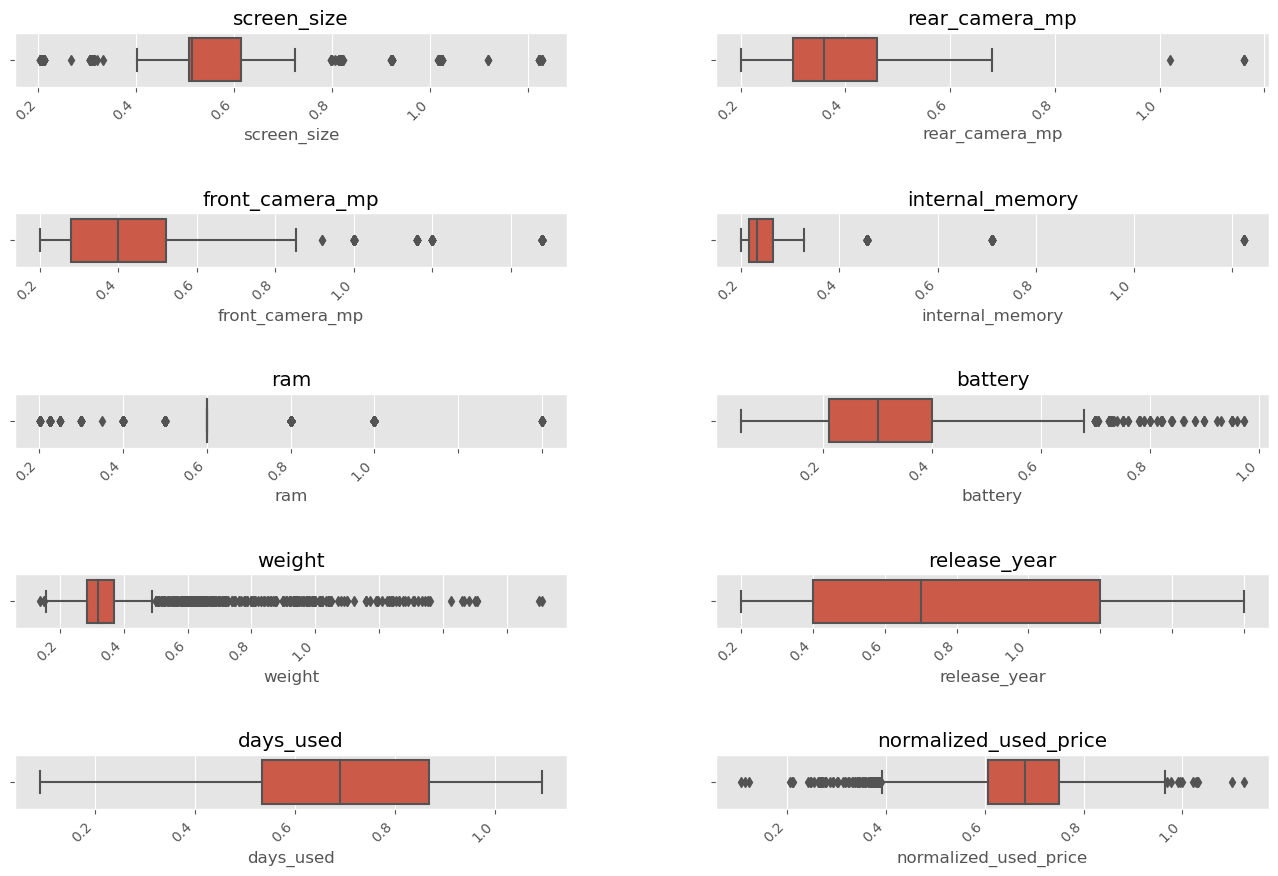

In [9]:
ncols = 2
nrows = math.floor(len(df_no_categoricas.columns)/ncols)
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,10))
fig.tight_layout(pad=7.0)
for i, ax in zip(range(len(df_no_categoricas.columns)), axes.flat):
  sns.boxplot(x=df_no_categoricas.iloc[:, i], data=df_no_categoricas, ax=ax)
  ax.set_title(df_no_categoricas.columns[i])
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right");

En los histogramas se observan datos extremos que aparecen principalmente más a la derecha de las distribuciones. Por ejemplo weight y battery. En el  boxplot se presentan mejor los puntos que escapan de los umbrales pre establecidos. Con el método "describe" podemos comparar mejor la cantidad de outliers sobre los registros totales.

In [10]:
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


Si medimos los umbrales de la siguiente manera (como en el boxplot):
* Q1 - 1.5 * (Q3 - Q1)
* Q3 + 1.5 * (Q3 - Q1)

Podemos calcular que proporción de observaciones se encuentran por fuera de los rangos.

In [11]:
valores_fuera_rango_max = list()
valores_fuera_rango_min = list()
for c in df.describe():
  umbral_min = df.describe()[c]["25%"] - 1.5 * (df.describe()[c].loc["75%"] - df.describe()[c].loc["25%"])
  umbral_max = df.describe()[c]["75%"] + 1.5 * (df.describe()[c].loc["75%"] - df.describe()[c].loc["25%"])
  valores_fuera_rango_min.append(umbral_min if umbral_min>0 else df.describe()[c]["min"])
  valores_fuera_rango_max.append(umbral_max)
df_umbral = pd.DataFrame({"umbral_min": valores_fuera_rango_min, "umbral_max": valores_fuera_rango_max}, index=df.describe().columns)
for i, c in enumerate(df_no_categoricas.columns):
  suma_de_outliers_min = df_no_categoricas.loc[df_no_categoricas[c] < df_umbral.loc[c, "umbral_min"]].groupby(c)[c].count().sum()
  suma_de_outliers_max = df_no_categoricas.loc[df_no_categoricas[c] > df_umbral.loc[c, "umbral_max"]].groupby(c)[c].count().sum()
  df_umbral.loc[c, "porc_outliers_min"] = suma_de_outliers_min / len(df_no_categoricas[c])
  df_umbral.loc[c, "porc_outliers_max"] = suma_de_outliers_max / len(df_no_categoricas[c])
df_umbral

,umbral_min,umbral_max,porc_outliers_min,porc_outliers_max
screen_size,8.740000,19.300000,0.057325,0.072959
rear_camera_mp,0.080000,25.000000,0.000000,0.001448
front_camera_mp,0.000000,17.000000,0.000000,0.063984
internal_memory,0.010000,136.000000,0.000000,0.039954
ram,4.000000,4.000000,0.096410,0.087435
battery,500.000000,6850.000000,0.000000,0.022293
weight,77.500000,249.500000,0.000869,0.105675
release_year,2008.000000,2024.000000,0.000000,0.000000
days_used,30.625000,1371.625000,0.000000,0.000000
normalized_used_price,2.951277,5.838354,0.021424,0.003185


Las dos últimas columnas muestran el porcentaje de registros por fuera de los umbrales determinados a través del boxplot. En el caso del tamaño de la pantalla, alrededor del 13% de las observaciones estarían por fuera de los rangos aceptables. Para la memoria RAM ocurre algo similar (aprox. 18%). El peso del dispositivo parece tener muchos valores por encima del umbral de valores máximos (11%).

**¿Hay correlación entre las variables?**

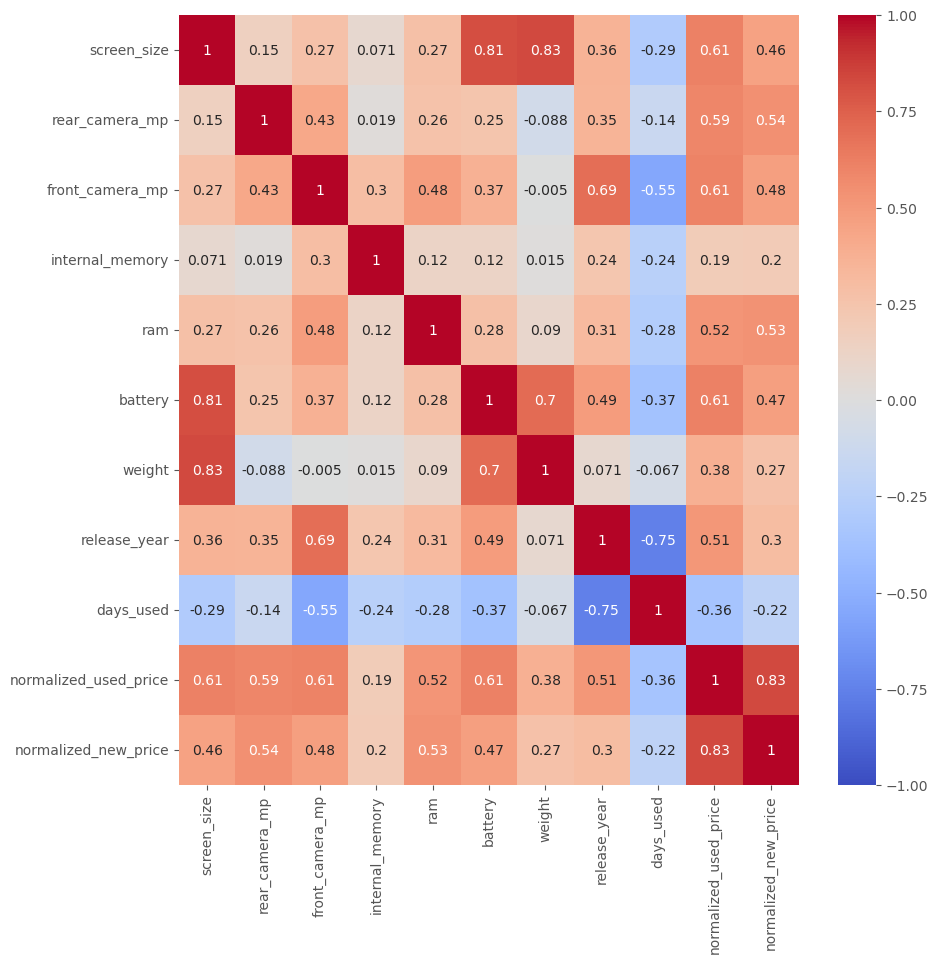

In [12]:
matriz_correlacion = df_no_categoricas.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matriz_correlacion, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm');

Se observan varias correlaciones fuertes mayores a 0.7, ya sean proporcionales o inversas. Para eso vamos a filtrar la matriz y buscar esas relaciones y cuantificar la magnitud.

In [13]:
lista_corr = list()
for i in matriz_correlacion:
  for j in matriz_correlacion.index:
    if i == j:
      pass
    elif any(i in l for l in lista_corr) and any(j in l for l in lista_corr):
      pass
    elif matriz_correlacion.loc[i, j] >= 0.7 or matriz_correlacion.loc[i, j] <= -0.7:
      lista_corr.append((i, j, matriz_correlacion.loc[i, j]))
for lc in lista_corr:
  print(f'Se observa una fuerte correlación {"positiva" if lc[2] >= 0 else "negativa"} entre las variables {lc[0]} y {lc[1]} de {lc[2]}.')

Se observa una fuerte correlación positiva entre las variables screen_size y battery de 0.8135331874762849.
Se observa una fuerte correlación positiva entre las variables screen_size y weight de 0.8288897828437943.
Se observa una fuerte correlación negativa entre las variables release_year y days_used de -0.7503899934944966.
Se observa una fuerte correlación positiva entre las variables normalized_used_price y normalized_new_price de 0.8344960187989929.


In [14]:
matriz_correlacion["normalized_used_price"].sort_values(ascending=False)[1:]

normalized_new_price    0.834496
screen_size             0.614785
battery                 0.613619
front_camera_mp         0.608074
rear_camera_mp          0.587302
ram                     0.520289
release_year            0.509790
weight                  0.382354
internal_memory         0.190993
days_used              -0.358264
Name: normalized_used_price, dtype: float64

Respecto de la variable target, que es el precio normalizado del dispositivo usado, observamos que el precio normalizado del dispositivo nuevo se relaciona significativamente. En tanto que el tamaño de la pantalla, la capacidad de la batería y los mega pixels de la cámara frontal, repercuten menor medida.

Es lógico pensar que mientras mejores sean las características del teléfono, mayor es el precio. Como también se entiende que a mayor días de uso, el valor del dispositivo sería menor, ergo, la correlación negativa.

**¿Cómo son las proporciones de las variables categóricas?**

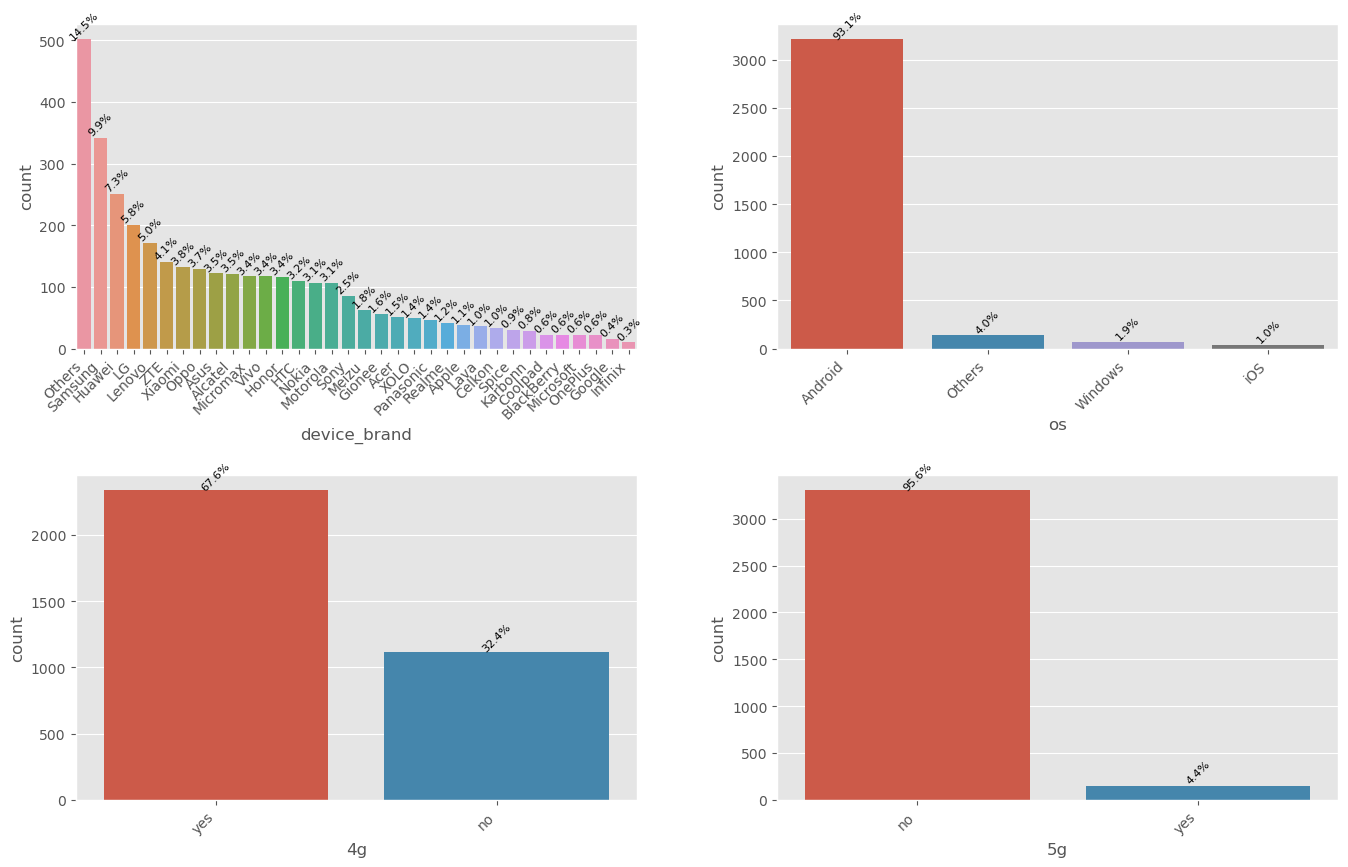

In [15]:
ncols = 2
nrows = math.ceil(len(df_categoricas.columns)/ncols)
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,10))
fig.tight_layout(pad=7.0)
for i, ax in zip(range(len(df_categoricas.columns)), axes.flat):
  sns.countplot(x=df_categoricas.iloc[:, i], order=df_categoricas.iloc[:, i].value_counts().index, data=df_categoricas, ax=ax)
  # ax.set_title(df_categoricas.columns[i])
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
  for p in ax.patches:
    total = len(df_categoricas.iloc[:, i])
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 10), textcoords='offset points', fontsize=8, rotation=45);

In [16]:
print(f'Las variables categóricas son {len(df.select_dtypes("object").columns)}, que representan un {len(df.select_dtypes("object").columns)/len(df.columns):.2%} '
      f'sobre el total de variables.')

Las variables categóricas son 4, que representan un 26.67% sobre el total de variables.


In [17]:
df_categoricas = df.select_dtypes("object")
print("Lista de variables categóricas:\n")
for col in df_categoricas:
  print(f"{col} --> {df_categoricas[col].unique()}\n")

Lista de variables categóricas:

device_brand --> ['Honor' 'Others' 'HTC' 'Huawei' 'Infinix' 'Lava' 'Lenovo' 'LG' 'Meizu'
 'Micromax' 'Motorola' 'Nokia' 'OnePlus' 'Oppo' 'Realme' 'Samsung' 'Vivo'
 'Xiaomi' 'ZTE' 'Apple' 'Asus' 'Coolpad' 'Acer' 'Alcatel' 'BlackBerry'
 'Celkon' 'Gionee' 'Google' 'Karbonn' 'Microsoft' 'Panasonic' 'Sony'
 'Spice' 'XOLO']

os --> ['Android' 'Others' 'iOS' 'Windows']

4g --> ['yes' 'no']

5g --> ['no' 'yes']



In [18]:
proporcion_device_brands = df_categoricas.groupby("device_brand")["device_brand"].count() / df_categoricas["device_brand"].count()
print("Marca de celulares muestreados que cubren el 80% de la muestra:")
display(proporcion_device_brands[proporcion_device_brands.sort_values(ascending=False).cumsum()<0.81].sort_values(ascending=False))
print(f"Son en total {len(proporcion_device_brands[proporcion_device_brands.sort_values(ascending=False).cumsum()<0.81])} sobre {len(proporcion_device_brands)}")

Marca de celulares muestreados que cubren el 80% de la muestra:


device_brand
Others      0.145339
Samsung     0.098726
Huawei      0.072669
LG          0.058193
Lenovo      0.049508
ZTE         0.040533
Xiaomi      0.038217
Oppo        0.037348
Asus        0.035321
Alcatel     0.035032
Micromax    0.033874
Vivo        0.033874
Honor       0.033584
HTC         0.031847
Motorola    0.030689
Nokia       0.030689
Name: device_brand, dtype: float64

Son en total 16 sobre 34


El dataset posee 4 variables categóricas:
* device_brand --> es la marca del dispositivo. Se observa que hay una cantidad importante de marcas diferentes. Posiblemente, sea necesario agruparlas al momento del EDA. 16 marcas acumulan el 80% de las observaciones. Samsung es la marca que más se vende, solo antecedida por la categoría "otros", que engloba marcas no especificadas en el dataset.
* os --> el sistema operativo. En este caso se encuentra una gran cantidad de dispositivos que poseen Android. En proporción 93%.
* 4g y 5g --> varabiales de valor "yes" and "no" que exponen si el celular tiene o no esa tecnología. Casi el 68% de los celulares posee 4G en tanto que solo menos del 5% posee 5G.

# **2 - Regresión**

## Transformación del dataset

### Feature celular o tablet

Vamos a analizar un dato particular. Hay pantallas con medidas muy grandes, Según la información vista en Internet, no existen celulares con pantallas mayores a 9-10 pulgadas. En todo caso, estos deben ser dispositivos distintos, estilo tablet. Para eso armamos una variable que diferencie los tipos de dispositivos.

In [19]:
df["type_of_device"] = df.apply(lambda x: "Tablet" if x["screen_size"] > 10 else "Mobile", axis=1)

4.918906274134287e-148

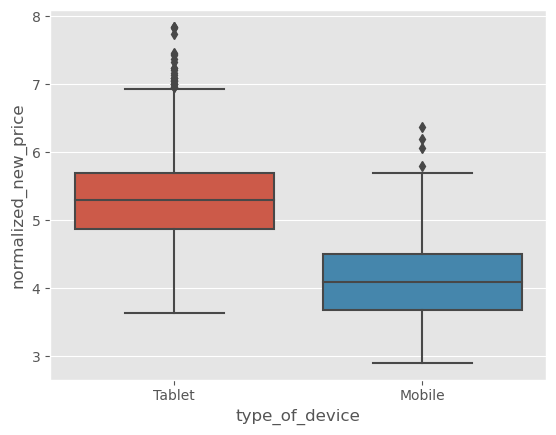

In [20]:
sns.boxplot(x=df["type_of_device"], y=df["normalized_new_price"]);
tablet_price = df["normalized_new_price"][df["type_of_device"]=="Tablet"].dropna()
mobile_price = df["normalized_new_price"][df["type_of_device"]=="Mobile"].dropna()

t_stat_type_price, p_value_type_price = stats.ttest_ind(
    tablet_price, mobile_price, equal_var=True)

p_value_type_price

También vemos que hay una diferencia significativa entre los precios de cada uno.

1.2361100929889333e-27

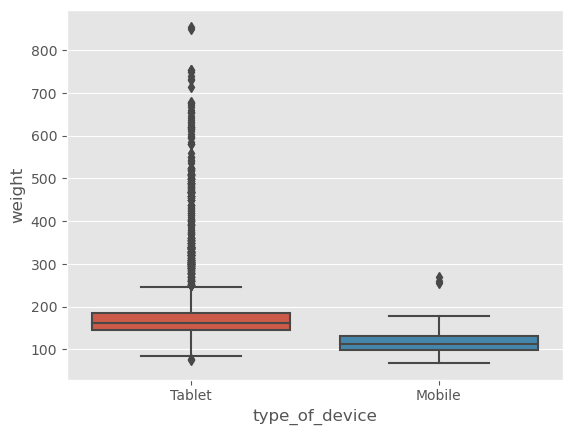

In [21]:
sns.boxplot(x=df["type_of_device"], y=df["weight"]);
tablet_weight = df["weight"][df["type_of_device"]=="Tablet"].dropna()
mobile_weight = df["weight"][df["type_of_device"]=="Mobile"].dropna()

t_stat_type_weight, p_value_type_weight = stats.ttest_ind(
    tablet_weight, mobile_weight, equal_var=True)

p_value_type_weight

4.8447395075690876e-76

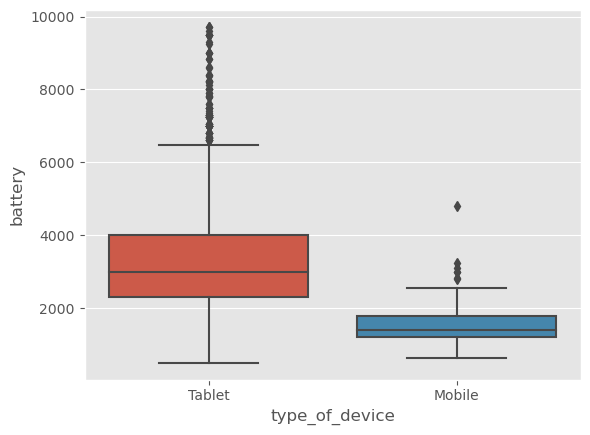

In [22]:
sns.boxplot(x=df["type_of_device"], y=df["battery"]);
tablet_battery = df["battery"][df["type_of_device"]=="Tablet"].dropna()
mobile_battery = df["battery"][df["type_of_device"]=="Mobile"].dropna()

t_stat_type_battery, p_value_type_battery = stats.ttest_ind(
    tablet_battery, mobile_battery, equal_var=True)

p_value_type_battery

Con un poco más de detalle, vemos que los dispositvos que no son celulares pesan significativamente más y tienen una bateria más grande. Esto se comprueba también viendo que se rechaza la H0 de que las medias son iguales.

### Vamos a resolver los valores nulos.

Valores de weight:

In [23]:
df[df["weight"].isnull()]["device_brand"].unique()

array(['XOLO'], dtype=object)

Solo para la marca XOLO.

In [24]:
df[df["device_brand"]=="XOLO"].groupby("screen_size").mean()

,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,,,,,,,,,,
7.75,5.000000,0.650000,16.000000,4.0,1500.000000,132.000000,2013.000000,1088.000000,3.516607,4.608465
10.16,4.471429,0.300000,16.000000,4.0,1421.428571,123.550000,2013.428571,719.428571,3.516725,4.508069
10.24,6.500000,0.650000,24.000000,4.0,1905.000000,145.000000,2013.000000,652.000000,4.003473,5.090905
10.29,6.333333,0.644444,19.555556,4.0,2022.222222,140.768750,2013.444444,845.666667,3.784040,4.632426
10.34,8.000000,1.825000,24.000000,4.0,1875.000000,136.250000,2013.250000,745.000000,3.916397,4.965437
12.67,8.000000,2.000000,32.000000,4.0,2500.000000,120.000000,2014.000000,992.000000,4.059063,4.789157
12.70,9.117647,2.811765,25.411765,4.0,2224.705882,129.829167,2014.117647,818.823529,4.039764,4.888735
12.83,11.333333,3.000000,26.666667,4.0,2800.000000,150.000000,2014.000000,955.000000,4.134474,5.046567
12.88,13.000000,5.000000,16.000000,4.0,4000.000000,148.850000,2013.000000,949.000000,4.556295,5.519980


Imputamos la media del peso según el tamaño de pantalla.

In [25]:
df["weight"].fillna(df.groupby(["screen_size"])["weight"].transform("mean"), inplace=True)
df["weight"].isnull().sum()

0

Valores de battery:

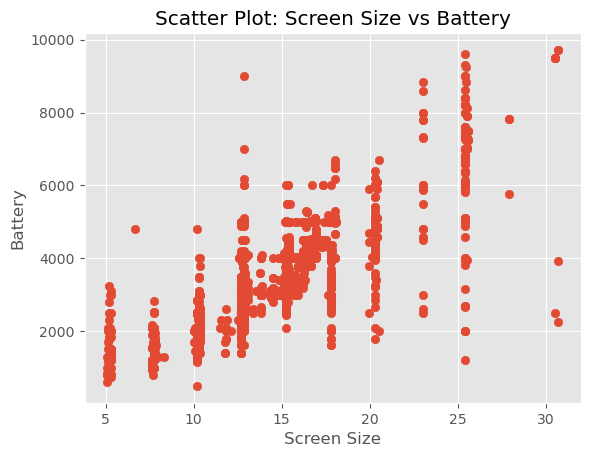

In [26]:
plt.scatter(df["screen_size"], df["battery"])
plt.title("Scatter Plot: Screen Size vs Battery")
plt.xlabel("Screen Size")
plt.ylabel("Battery")
plt.show()

Observando esta relación entre el tamaño de la pantalla y la batería, procedemos a rellenar nulos en la columna "battery".

In [27]:
df[df["battery"].isnull()]["device_brand"].unique()

array(['Meizu', 'Microsoft', 'Nokia'], dtype=object)

In [28]:
df["battery"].fillna(df.groupby(["device_brand", "type_of_device", "screen_size"])["battery"].transform("mean"), inplace=True)
df["battery"].isnull().sum()

2

In [29]:
df["battery"].fillna(df.groupby(["device_brand", "type_of_device"])["battery"].transform("mean"), inplace=True)
df["battery"].isnull().sum()

0

Valores de front_camera_mp:

In [30]:
df[df["front_camera_mp"].isnull()]["device_brand"].unique()

array(['Google'], dtype=object)

In [31]:
df[df["device_brand"]=="Google"].groupby("front_camera_mp").mean()

,screen_size,rear_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
front_camera_mp,,,,,,,,,,
2.0,25.4500,8.000000,32.000000,4.000000,9240.000000,517.000000,2015.000000,584.000000,5.032201,5.826059
8.0,13.8375,12.216667,58.666667,4.666667,3236.666667,163.916667,2018.166667,525.416667,4.851146,5.977655


In [32]:
df["front_camera_mp"].fillna(df.groupby(["device_brand", "type_of_device"])["front_camera_mp"].transform("mean"), inplace=True)
df["front_camera_mp"].isnull().sum()

0

Valores de internal_memory:

In [33]:
df[df["internal_memory"].isnull()]["device_brand"].unique()

array(['Nokia'], dtype=object)

In [34]:
df[df["internal_memory"].isnull()]

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,type_of_device
117,Nokia,Others,5.18,yes,no,0.3,0.0,NaN,0.02,1200.0,86.5,2019,234,2.721295,3.688379,Mobile
2035,Nokia,Others,5.18,no,no,5.0,0.0,NaN,0.03,1020.0,157.0,2019,501,2.343727,3.420346,Mobile
2064,Nokia,Others,5.18,no,no,0.3,0.0,NaN,0.02,1100.0,78.4,2015,559,2.587012,3.378611,Mobile
2092,Nokia,Others,7.62,no,no,5.0,0.0,NaN,0.02,1010.0,100.0,2013,1043,3.535728,4.370586,Mobile


In [35]:
df[(df["device_brand"]=="Nokia") & (df["type_of_device"]=="Mobile")].groupby("rear_camera_mp").mean()

,screen_size,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
rear_camera_mp,,,,,,,,,,
0.30,5.180000,0.0,0.076000,0.024444,1113.043478,86.133333,2018.333333,445.833333,2.806171,3.440215
1.30,5.230000,0.0,0.060000,0.025000,1425.000000,89.450000,2013.500000,836.000000,3.788654,4.089575
2.00,5.370588,0.0,0.083529,0.024706,1237.647059,101.070588,2015.411765,659.647059,3.364658,4.093873
3.15,6.400000,0.0,0.080000,0.020000,1155.000000,100.100000,2013.000000,837.000000,3.850057,4.310053
5.00,6.400000,0.0,0.080000,0.028000,1108.333333,111.833333,2014.000000,910.833333,3.672203,4.320970


In [36]:
df["internal_memory"].fillna(df.groupby(["device_brand", "type_of_device", "rear_camera_mp"])["internal_memory"].transform("mean"), inplace=True)
df["internal_memory"].isnull().sum()

0

Valores de ram:

In [37]:
df[df["ram"].isnull()]["device_brand"].unique()

array(['Nokia'], dtype=object)

In [38]:
df[df["ram"].isnull()]

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,type_of_device
114,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,1020.00000,91.3,2020,288,2.729159,2.911263,Mobile
335,Nokia,Others,5.18,no,no,0.3,0.0,0.10,NaN,1200.00000,88.2,2020,327,3.062924,3.689129,Mobile
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,1138.26087,82.6,2016,1023,2.765060,3.657905,Mobile
2090,Nokia,Others,7.62,no,no,5.0,0.0,0.06,NaN,1200.00000,111.4,2013,1001,3.827771,4.605770,Mobile


In [39]:
df[(df["device_brand"]=="Nokia") & (df["type_of_device"]=="Mobile")].groupby("screen_size").mean()

,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,,,,,,,,,,
5.18,1.562000,0.0,0.081280,0.024091,1138.260870,94.672000,2016.720000,602.640000,3.201439,3.783390
5.28,1.922222,0.0,0.073333,0.027778,1336.666667,101.288889,2015.111111,661.111111,3.341715,4.084726
7.62,4.030000,0.0,0.080000,0.022500,1144.000000,104.700000,2013.000000,871.800000,3.614494,4.451246


In [40]:
df["ram"].fillna(df.groupby(["device_brand", "type_of_device", "screen_size"])["ram"].transform("mean"), inplace=True)
df["ram"].isnull().sum()

0

Valores de rear_camera_mp:

In [41]:
df[df["rear_camera_mp"].isnull()]["device_brand"].unique()

array(['Infinix', 'Lava', 'Meizu', 'Motorola', 'OnePlus', 'Oppo',
       'Realme', 'Vivo', 'Xiaomi', 'ZTE', 'Coolpad', 'Asus', 'BlackBerry',
       'Panasonic', 'Sony'], dtype=object)

In [42]:
df[df["rear_camera_mp"].isnull()]["type_of_device"].unique()

array(['Tablet'], dtype=object)

In [43]:
df["price_bucket"] = pd.cut(df["normalized_new_price"], bins=5)
df[(df["type_of_device"]=="Tablet")].groupby(["device_brand", "price_bucket"]).mean().reset_index()

,device_brand,price_bucket,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Acer,"(2.896, 3.891]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acer,"(3.891, 4.88]",14.017222,4.122222,1.822222,26.666667,4.000000,2491.666667,213.022222,2014.388889,800.722222,3.984335,4.667417
2,Acer,"(4.88, 5.869]",15.955484,8.870968,2.993548,21.677419,3.838710,3397.741935,240.487097,2014.451613,785.032258,4.414267,5.345446
3,Acer,"(5.869, 6.859]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Acer,"(6.859, 7.848]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,ZTE,"(2.896, 3.891]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,ZTE,"(3.891, 4.88]",12.138261,8.357609,3.734783,36.521739,3.657609,2396.739130,148.445652,2015.739130,775.152174,3.998928,4.577267
167,ZTE,"(4.88, 5.869]",12.908182,12.506579,7.049351,35.324675,3.987013,3042.792208,157.016234,2015.545455,741.545455,4.464068,5.403275
168,ZTE,"(5.869, 6.859]",15.272500,19.423077,10.937500,127.000000,5.250000,3701.875000,181.875000,2018.250000,484.937500,5.005123,6.187385


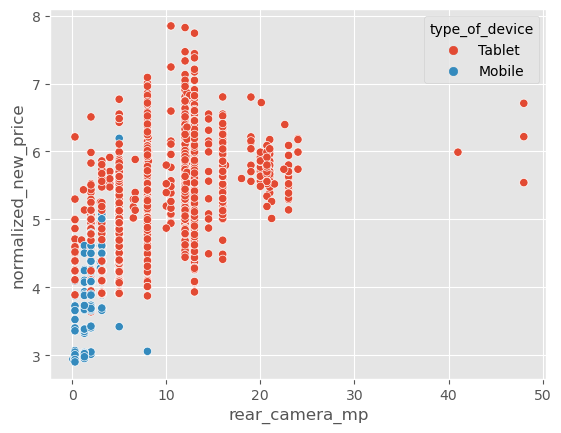

In [44]:
sns.scatterplot(data=df, x="rear_camera_mp", y="normalized_new_price", hue="type_of_device");

In [45]:
df["rear_camera_mp"].fillna(df.groupby(["type_of_device", "price_bucket"])["rear_camera_mp"].transform("mean"), inplace=True)
df["rear_camera_mp"].isnull().sum()
df.drop(columns="price_bucket", inplace=True)

### Eliminamos las variables con una correlación de 0.7 o mayor.

In [46]:
lista_corr

[('screen_size', 'battery', 0.8135331874762849),
 ('screen_size', 'weight', 0.8288897828437943),
 ('release_year', 'days_used', -0.7503899934944966),
 ('normalized_used_price', 'normalized_new_price', 0.8344960187989929)]

In [47]:
lista_drop = ["battery", "weight", "release_year", "normalized_new_price"]
df.drop(columns=lista_drop, inplace=True)
df_categoricas = df.select_dtypes("object")
df_no_categoricas = df.loc[:, [c for c in df.columns if c not in df_categoricas.columns]]

In [48]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,days_used,normalized_used_price,type_of_device
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,127,4.307572,Tablet
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,325,5.162097,Tablet
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,162,5.111084,Tablet
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,345,5.135387,Tablet
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,293,4.389995,Tablet


In [49]:
rows_with_nan = df[df.isnull().any(axis=1)]
rows_with_nan

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,days_used,normalized_used_price,type_of_device


### Para el caso de la marca del dispositivo se necesita un tratamiento especial dada la cantidad de etiquetas que hay.

In [50]:
top_brand = ["Samsung", "Apple", "Huawei", "HTC", "LG", "Motorola", "Nokia", "OnePlus", "Oppo", "Xiaomi", "Asus", "Google", "Microsoft", "Sony"]

In [51]:
df["top_brand"] = df.apply(lambda x: "High" if x["device_brand"] in top_brand else "Low", axis=1)
df["top_brand"].value_counts()
df.drop(columns=["device_brand"], inplace=True)


In [52]:
# marca_value_counts = X_train["device_brand"].value_counts()
# X_train["new_brand"] = X_train["device_brand"].map(lambda x: marca_value_counts[x] / len(X_train["device_brand"]))
# X_train["new_brand"] = X_train.apply(lambda x: "Others" if x["new_brand"] < 0.04 else x["device_brand"], axis=1)
# print(X_train["new_brand"].value_counts())
# X_train["device_brand"] = X_train["new_brand"]
# X_train.drop(columns="new_brand", inplace=True)

Agrupamos la marcas de los dispositivos en dos grandes grupos: marcas grandes o reconocidas vs marcas de menor categoria. Esto facilita el procesamiento de la regresión y balancea mejor la muestra

### El resto de las variables categóricas se transforma más fácilmente.

In [53]:
df.rename(columns={"4g": "four_g", "5g": "five_g"}, inplace=True)
lista_categoricas_a_label = ["os", "four_g", "five_g", "type_of_device", "top_brand"]
df_reg = pd.get_dummies(df, columns=lista_categoricas_a_label, drop_first=True) # .drop(columns=["four_g_no", "five_g_yes"])
display(df_reg.head())

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,days_used,normalized_used_price,os_Others,os_Windows,os_iOS,four_g_yes,five_g_yes,type_of_device_Tablet,top_brand_Low
0,14.50,13.0,5.0,64.0,3.0,127,4.307572,0,0,0,1,0,1,1
1,17.30,13.0,16.0,128.0,8.0,325,5.162097,0,0,0,1,1,1,1
2,16.69,13.0,8.0,128.0,8.0,162,5.111084,0,0,0,1,1,1,1
3,25.50,13.0,8.0,64.0,6.0,345,5.135387,0,0,0,1,1,1,1
4,15.32,13.0,8.0,64.0,3.0,293,4.389995,0,0,0,1,0,1,1


### División del dataset (train y test)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
target = "normalized_used_price"
variables = [c for c in df_reg if c not in [target]]
X = df_reg[variables]
y = df_reg[target]
rs = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)
print(f"Dimensiones de la partición de entrenamiento: {X_train.shape} para las variables y {y_train.shape} para la variable a predecir.")

Dimensiones de la partición de entrenamiento: (2417, 13) para las variables y (2417,) para la variable a predecir.


## Cálculo de regresión



In [56]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

Como primera medida vamos a probar como ajustaría un modelo sin tranformar donde solo se tomen en cuenta las variables no catergóricas. El primer paso es dividir el dataset en el set de training y de test.

In [57]:
X_train_reg = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_reg)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.751
Model:                               OLS   Adj. R-squared:                  0.750
Method:                    Least Squares   F-statistic:                     557.9
Date:                   Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                           23:16:07   Log-Likelihood:                -447.52
No. Observations:                   2417   AIC:                             923.0
Df Residuals:                       2403   BIC:                             1004.
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.4636      0.050     49.386      0.000       2.366       2.561
screen_size               0.0627      0.002     33.722      0.000       0.059       0.066
rear_camera_mp            0.0369      0.002     22.445      0.000       0.034       0.040
front_camera_mp           0.0179      0.001     14.349      0.000       0.015       0.020
internal_memory           0.0006   8.28e-05      7.581      0.000       0.000       0.001
ram                       0.0658      0.006     10.880      0.000       0.054       0.078
days_used                 0.0001   3.07e-05      3.677      0.000    5.27e-05       0.000
os_Others                 0.0357      0.041      0.862      0.389      -0.045       0.117
os_Windows                0.0068      0.046      0.149      0.882      -0.083       0.096
os_iOS                    0.2944      0.055      5.377      0.000       0.187       0.402
four_g_yes                0.1220      0.017      7.181      0.000       0.089       0.155
five_g_yes                0.0738      0.038      1.922      0.055      -0.001       0.149
type_of_device_Tablet     0.1603      0.039      4.083      0.000       0.083       0.237
top_brand_Low            -0.0831      0.013     -6.643      0.000      -0.108      -0.059
==============================================================================
Omnibus:                      143.727   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.876
Skew:                           0.009   Prob(JB):                    1.00e-132
Kurtosis:                       5.457   Cond. No.                     7.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
print("Chequeamos las variables que dieron no significatvias y volvemos a procesar el modelo sin ellas")
p_val_df = model.summary2().tables[1][model.summary2().tables[1]["P>|t|"]>=0.05]
columnas_no_significativas = p_val_df.index.values.tolist()
print(columnas_no_significativas)
# X_train_reg = X_train_reg.drop(columns=columnas_no_significativas, inplace=True)

Chequeamos las variables que dieron no significatvias y volvemos a procesar el modelo sin ellas
['os_Others', 'os_Windows', 'five_g_yes']


In [59]:
X_train_reg = X_train.drop(columns=columnas_no_significativas)
X_train_reg = sm.add_constant(X_train_reg)
model = sm.OLS(y_train, X_train_reg)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.751
Model:                               OLS   Adj. R-squared:                  0.750
Method:                    Least Squares   F-statistic:                     724.3
Date:                   Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                           23:16:07   Log-Likelihood:                -449.89
No. Observations:                   2417   AIC:                             921.8
Df Residuals:                       2406   BIC:                             985.5
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.4842      0.041     61.078      0.000       2.404       2.564
screen_size               0.0626      0.002     33.790      0.000       0.059       0.066
rear_camera_mp            0.0365      0.002     22.336      0.000       0.033       0.040
front_camera_mp           0.0180      0.001     14.434      0.000       0.016       0.020
internal_memory           0.0006   8.18e-05      7.914      0.000       0.000       0.001
ram                       0.0710      0.005     13.730      0.000       0.061       0.081
days_used              9.939e-05      3e-05      3.308      0.001    4.05e-05       0.000
os_iOS                    0.2916      0.055      5.325      0.000       0.184       0.399
four_g_yes                0.1218      0.017      7.179      0.000       0.089       0.155
type_of_device_Tablet     0.1343      0.033      4.089      0.000       0.070       0.199
top_brand_Low            -0.0836      0.012     -6.712      0.000      -0.108      -0.059
==============================================================================
Omnibus:                      144.196   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              609.702
Skew:                           0.028   Prob(JB):                    4.03e-133
Kurtosis:                       5.460   Cond. No.                     6.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
model.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.750
1,Dependent Variable:,normalized_used_price,AIC:,921.7740
2,Date:,2023-11-28 23:16,BIC:,985.4671
3,No. Observations:,2417,Log-Likelihood:,-449.89
4,Df Model:,10,F-statistic:,724.3
5,Df Residuals:,2406,Prob (F-statistic):,0.00
6,R-squared:,0.751,Scale:,0.085346


Según el F cuadrado el modelo es significativo, y se rechaza la H0 de que los betas son cero.

In [61]:
model.summary2().tables[2]

,0,1,2,3
0,Omnibus:,144.196,Durbin-Watson:,1.984
1,Prob(Omnibus):,0.000,Jarque-Bera (JB):,609.702
2,Skew:,0.028,Prob(JB):,0.000
3,Kurtosis:,5.460,Condition No.:,6645


* Según el test de Durbin-Watson para la autocorrelación de residuos, se encuentra muy cercano a 2, que significa que no se detecta autocorrelación.
* Los residuos no se distribuyen normalmente.

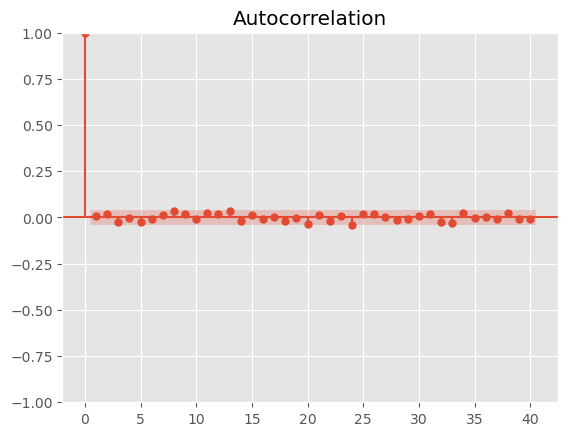

In [62]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05)
acf.show()

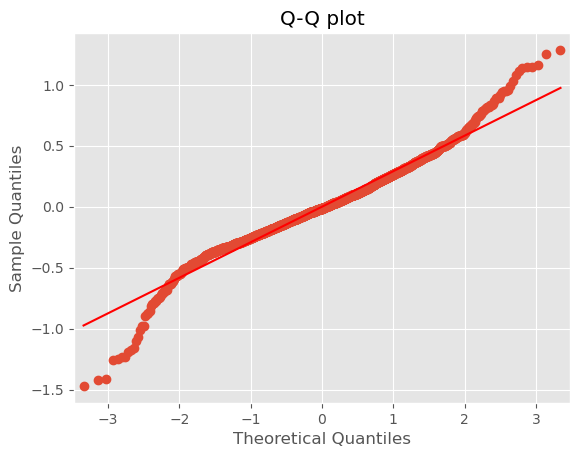

In [63]:
sm.ProbPlot(model.resid).qqplot(line='s');
plt.title('Q-Q plot');

Text(0.5, 0, 'Residuos')

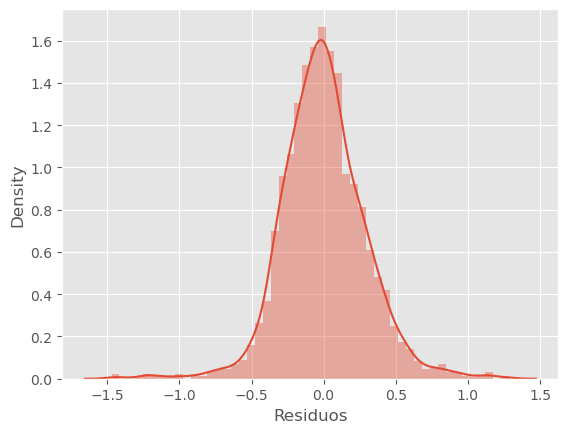

In [64]:
y_pred = model.predict()
resids = model.resid
sns.distplot(resids);
plt.xlabel('Residuos')

screen_size              1.436757
rear_camera_mp           1.683335
front_camera_mp          2.189509
internal_memory          1.185698
ram                      1.454598
days_used                1.593899
os_iOS                   1.040867
four_g_yes               1.783618
type_of_device_Tablet    1.611396
top_brand_Low            1.096748
dtype: float64

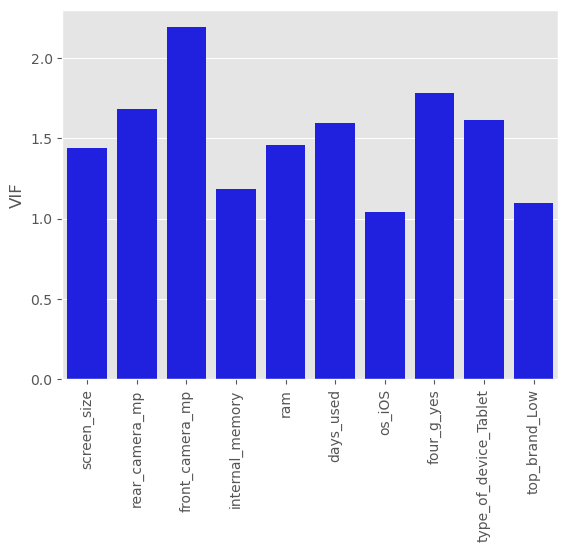

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train_reg.values, i) for i in range(1, X_train_reg.shape[1])]
sns.barplot(x=np.arange(len(vif)),y=vif,color='b');
plt.ylabel('VIF');
plt.xticks(np.arange(len(vif)), X_train_reg.columns[1:], rotation=90);

display(pd.Series(vif, index=X_train_reg.columns[1:]))

No consideramos que la multicolinealidad sea alta para las variables. Tampoco se encuentra multicolinealidad perfecta entre variables.

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_test_reg = X_test.drop(columns=columnas_no_significativas)
X_test_reg = sm.add_constant(X_test_reg)

y_pred = model.predict(X_test_reg)

def print_metrics(y, y_pred):
    print ('MAE:', mean_absolute_error(y, y_pred).round(2))
    print ('MSE:', mean_squared_error(y, y_pred).round(2))
    print ('RMSE:', np.sqrt(mean_squared_error(y, y_pred)).round(2))
    print ('R2:', r2_score(y, y_pred).round(4))

print_metrics(y_test, y_pred)

MAE: 0.22
MSE: 0.09
RMSE: 0.3
R2: 0.7504


El modelo tiene una performance similar sobre el train y test. Los indicadores restantes se encuentran cercanos a cero, lo cual implica un modelo que ajusta bien.

### Analizamos si se puede mejorar con Lasso o Ridge:

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)

In [68]:
from numpy import linalg as LA

In [69]:
from sklearn.linear_model import Ridge

rlr = Ridge(alpha=10000)

rlr.fit(X_train_reg, y_train)

y_pred_train_ridge = rlr.predict(X_train_reg)
y_pred_test_ridge = rlr.predict(X_test_reg)

print ('R2 train Ridge: {}'.format(r2_score(y_train, y_pred_train_ridge).round(4)))
print ('R2 test Ridge: {}'.format(r2_score(y_test, y_pred_test_ridge).round(4)))

print('norma del vector de parametros regresión Ridge: {}'.format(LA.norm(rlr.coef_).round(4)))

R2 train Ridge: 0.4713
R2 test Ridge: -648.4031
norma del vector de parametros regresión Ridge: 0.1194


En este caso, aplicar Ridge empeora el R2 del train. Para el caso de test es negativo, con lo cual no mejora el modelo.

In [70]:
from sklearn.linear_model import Lasso

llr = Lasso(alpha=1000)

llr.fit(X_train_reg, y_train)

y_pred_train_lasso = llr.predict(X_train_reg)
y_pred_test_lasso = llr.predict(X_test_reg)

print ('R2 train Lasso: {}'.format(r2_score(y_train, y_pred_train_lasso).round(4)))
print ('R2 test Lasso: {}'.format(r2_score(y_test,y_pred_test_lasso).round(4)))

R2 train Lasso: 0.0
R2 test Lasso: -0.0003


In [71]:
print(f"Número de coeficientes que pasaron a valer cero: {(llr.coef_==0).sum()}")

Número de coeficientes que pasaron a valer cero: 11


El modelo de Lasso elimina 11 variables, pero presenta un R2 de cero para train y test. Tampoco sirve para mejorar el modelo.

Para asegurarnos de que existe (o no) un valor de alpha que pueede generar una regresión con regularización más robusta, procedemos a hacer cross-validaton.

In [72]:
from sklearn.model_selection import GridSearchCV

rlr = Ridge()
alphas = np.logspace(0, 10000000, 100)
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(rlr, param_grid, cv=5, scoring="r2", verbose=3)
grid = grid_search.fit(X_train_reg, y_train)


print(f"Con un R2 de {grid_search.best_score_}")
alpha_optimo = grid_search.best_params_['alpha']
print('El mejor valor de alpha Ridge es:', alpha_optimo)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .........................alpha=1.0;, score=0.751 total time=   0.0s
[CV 2/5] END .........................alpha=1.0;, score=0.711 total time=   0.0s
[CV 3/5] END .........................alpha=1.0;, score=0.741 total time=   0.0s
[CV 4/5] END .........................alpha=1.0;, score=0.745 total time=   0.0s
[CV 5/5] END .........................alpha=1.0;, score=0.772 total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 5/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...........................alpha=

[CV 4/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 5/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 5/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 5/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 1/5] END ...............

[CV 5/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 5/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 5/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...............

[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 5/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 5/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...............

In [73]:
llr = Lasso()
alphas = np.logspace(0, 10000000, 100)
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(rlr, param_grid, cv=5, scoring="r2", verbose=3)
grid = grid_search.fit(X_train_reg, y_train)

print(f"Con un R2 de {grid_search.best_score_}")
alpha_optimo = grid_search.best_params_['alpha']
print('El mejor valor de alpha para Lasso es:', alpha_optimo)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .........................alpha=1.0;, score=0.751 total time=   0.0s
[CV 2/5] END .........................alpha=1.0;, score=0.711 total time=   0.0s
[CV 3/5] END .........................alpha=1.0;, score=0.741 total time=   0.0s
[CV 4/5] END .........................alpha=1.0;, score=0.745 total time=   0.0s
[CV 5/5] END .........................alpha=1.0;, score=0.772 total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 5/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...........................alpha=

[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 5/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 5/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 5/5] END ...............

[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 5/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 5/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...............

[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 5/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 5/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 1/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 2/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 3/5] END ...........................alpha=inf;, score=nan total time=   0.0s
[CV 4/5] END ...............

El R2 y R2 ajustado siguen siendo levemente mejores para la regresión lineal sin regularización.

# Reducción de la Dimensionalidad

Importamos las librerías para visualizar y realizar análisis numérico

In [74]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Para comenzar, enfocaremos el análisis únicamente en las variables cuantitativas

In [75]:
df_no_categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_size            3454 non-null   float64
 1   rear_camera_mp         3454 non-null   float64
 2   front_camera_mp        3454 non-null   float64
 3   internal_memory        3454 non-null   float64
 4   ram                    3454 non-null   float64
 5   days_used              3454 non-null   int64  
 6   normalized_used_price  3454 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 189.0 KB


Calculamos métricas de las variables:

In [76]:
# Calculamos la media de las variables
mean_no_categoricas = df_no_categoricas.mean(axis=0)
print(mean_no_categoricas)

print("\n")

# Calculamos la matriz de covarianzas
m_cov_no_categoricas = np.cov(df_no_categoricas)
print("Matriz de covarianzas: ")
print(m_cov_no_categoricas)

screen_size               13.713115
rear_camera_mp             9.519474
front_camera_mp            6.554799
internal_memory           54.509989
ram                        4.031475
days_used                674.869716
normalized_used_price      4.364712
dtype: float64


Matriz de covarianzas: 
[[ 2174.41668483  5519.32071995  3004.32568365 ...  3164.36892509
   2354.49568465  2705.06307993]
 [ 5519.32071995 14217.86095697  7460.07639126 ...  8319.84717164
   6148.61158787  7165.70516271]
 [ 3004.32568365  7460.07639126  4439.58038679 ...  3971.5639898
   2996.34427431  3312.17207036]
 ...
 [ 3164.36892509  8319.84717164  3971.5639898  ...  5193.19364538
   3796.69813076  4556.89012341]
 [ 2354.49568465  6148.61158787  2996.34427431 ...  3796.69813076
   2784.13585471  3320.18798863]
 [ 2705.06307993  7165.70516271  3312.17207036 ...  4556.89012341
   3320.18798863  4020.43166771]]


Analizamos las variables y observamos que necesitan normalizarse

In [77]:
df_no_categoricas.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,days_used,normalized_used_price
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.519474,6.554799,54.509989,4.031475,674.869716,4.364712
std,3.805280,4.719829,6.968393,84.943368,1.371124,248.580166,0.588914
min,5.080000,0.080000,0.000000,0.010000,0.020000,91.000000,1.536867
25%,12.700000,5.000000,2.000000,16.000000,4.000000,533.500000,4.033931
50%,12.830000,8.000000,5.000000,32.000000,4.000000,690.500000,4.405133
75%,15.340000,13.000000,8.000000,64.000000,4.000000,868.750000,4.755700
max,30.710000,48.000000,32.000000,1024.000000,12.000000,1094.000000,6.619433


Antes de normalizar, confirmamos que ya habíamos imputado los valores nulos:

In [78]:
df_no_categoricas.isnull().sum()

screen_size              0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
days_used                0
normalized_used_price    0
dtype: int64

In [79]:
from sklearn.preprocessing import StandardScaler

# Instanciamos la clase creando el objeto scaler
scaler = StandardScaler()

# Noramlizamos los datos
df_no_categoricas_norm = pd.DataFrame(scaler.fit_transform(df_no_categoricas), index=df_no_categoricas.index, columns=df_no_categoricas.columns)
df_no_categoricas_norm.head()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,days_used,normalized_used_price
0,0.206818,0.737533,-0.223154,0.111738,-0.752393,-2.204315,-0.097040
1,0.942744,0.737533,1.355631,0.865290,2.894778,-1.407676,1.354188
2,0.782417,0.737533,0.207424,0.865290,2.894778,-2.063495,1.267554
3,3.097957,0.737533,0.207424,0.111738,1.435910,-1.327208,1.308827
4,0.422339,0.737533,0.207424,0.111738,-0.752393,-1.536426,0.042937


Luego, observamos nuevamente las medias y la matriz de covarianzas

In [80]:
mean_no_categoricas_norm = df_no_categoricas_norm.mean(axis=0)
print("Medias: ")
print(mean_no_categoricas_norm)

print("\n")

m_cov_no_categoricas_norm = np.cov(df_no_categoricas_norm)
print("Matriz de covarianzas: ")
print(m_cov_no_categoricas_norm)

Medias: 
screen_size             -8.720024e-16
rear_camera_mp           1.832993e-15
front_camera_mp          2.078004e-15
internal_memory         -1.497837e-15
ram                     -1.310539e-15
days_used               -4.213319e-16
normalized_used_price   -2.710628e-16
dtype: float64


Matriz de covarianzas: 
[[0.89649273 0.57762637 0.7486952  ... 0.80886055 0.927089   0.79770428]
 [0.57762637 1.61997557 1.79892664 ... 0.47046953 0.31747696 0.2562035 ]
 [0.7486952  1.79892664 2.17466982 ... 0.61559796 0.43919314 0.33217786]
 ...
 [0.80886055 0.47046953 0.61559796 ... 0.77744148 0.89297195 0.74131426]
 [0.927089   0.31747696 0.43919314 ... 0.89297195 1.08294677 0.90042893]
 [0.79770428 0.2562035  0.33217786 ... 0.74131426 0.90042893 0.81410003]]


Graficaremos los datos para tener un acercamiento visual de la correlación entre todas las variables. (No olvidemos que las variables altamente correlacionadas fueron eliminadas durante la construcción de la regresión).

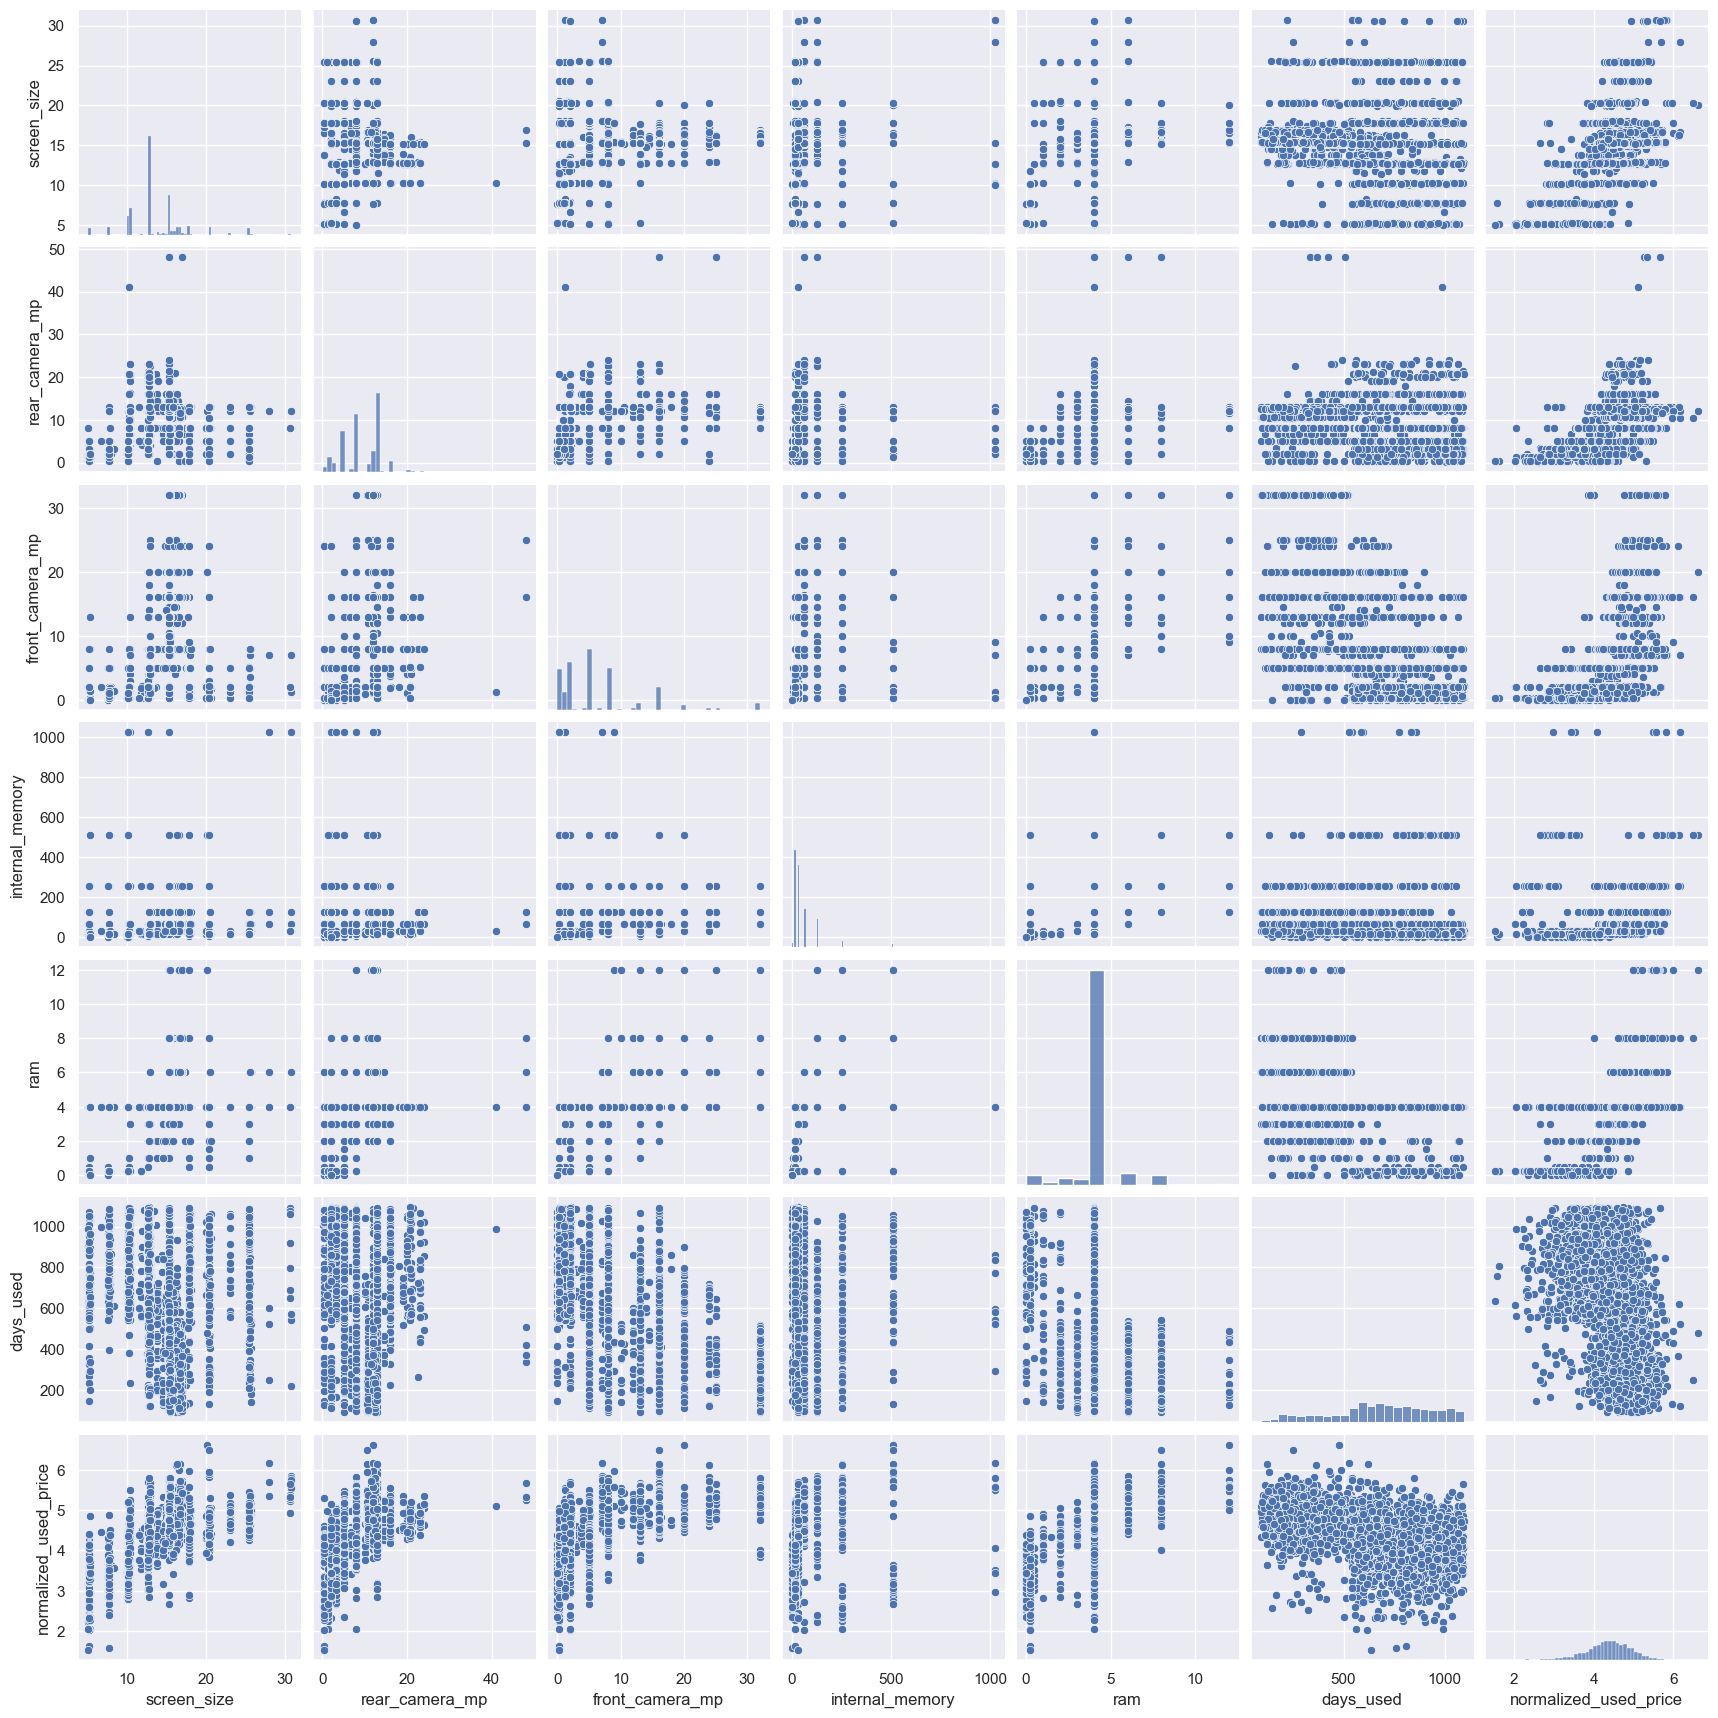

In [81]:
sns.pairplot(data=df_no_categoricas)

### A continuación, importamos la clase PCA para buscar los componentes principales

In [82]:
from sklearn.decomposition import PCA

# Instanciamos la clase pidiendo que conserve los 7 CPs (también podríamos instanciar sin especificar el nº de componentes).
pca_7cp = PCA(n_components=7)

# Con el método fit() calculammos los componentes principales
pca_7cp.fit(df_no_categoricas_norm)

PCA(n_components=7)

In [83]:
print(pca_7cp.components_)

[[ 0.33871984  0.33747381  0.46403664  0.19287259  0.37859852 -0.35248372
   0.50126724]
 [-0.213457   -0.40851087  0.18327809  0.71832927 -0.0908641  -0.41073948
  -0.24698981]
 [-0.74127304  0.5858778   0.21845044  0.14684068  0.04252552  0.18152437
  -0.05673779]
 [ 0.305169    0.1955812  -0.24668571  0.62239149 -0.2653495   0.5435175
   0.23360916]
 [-0.10607222 -0.33094462 -0.07080403  0.13031581  0.82839994  0.41270822
  -0.02558086]
 [-0.01416717  0.34387208 -0.76336411  0.13462827  0.26965135 -0.44793226
  -0.08571224]
 [ 0.43085857  0.33159184  0.23402292  0.05256314  0.13126226  0.0878325
  -0.7886278 ]]


Observamos la varianza representada por cada uno de los componentes principales

In [84]:
print(pca_7cp.explained_variance_)

[3.09551057 1.09008304 0.88501578 0.73680304 0.67976603 0.3379839
 0.17686486]


Y observamos que la suma de las varianzas responde a la varianza total acumulada, que, luego de la normalación, es '1' para cada componente:

In [85]:
pca_7cp.explained_variance_.sum()

7.002027222704889

Veamos qué sucede si intentamos conservar el 80% de la varianza explicada:

In [86]:
pca_4cp = PCA(n_components=0.8, svd_solver='full')

# Con el método fit() calculamos los componentes principales
pca_4cp.fit(df_no_categoricas_norm)

# Con el método transform() calculamos la proyección de nuestros datos sobre los 3 cp.
df_no_categoricas_norm_pca = pca_4cp.transform(df_no_categoricas_norm)

print("Forma original:   ", df_no_categoricas_norm.shape)
print("Forma transformada:", df_no_categoricas_norm_pca.shape)

Forma original:    (3454, 7)
Forma transformada: (3454, 4)


Como podemos observar, para conservar el 80% de la varianza explicada necesitamos los primeros 4 CPs.

In [87]:
print(pca_4cp.components_)

[[ 0.33871984  0.33747381  0.46403664  0.19287259  0.37859852 -0.35248372
   0.50126724]
 [-0.213457   -0.40851087  0.18327809  0.71832927 -0.0908641  -0.41073948
  -0.24698981]
 [-0.74127304  0.5858778   0.21845044  0.14684068  0.04252552  0.18152437
  -0.05673779]
 [ 0.305169    0.1955812  -0.24668571  0.62239149 -0.2653495   0.5435175
   0.23360916]]


Graficando las varianzas de cada componente y el ratio asociado, podemos ver cómo se va completando la varianza acumulada y el aporte de cada CP a la misma:

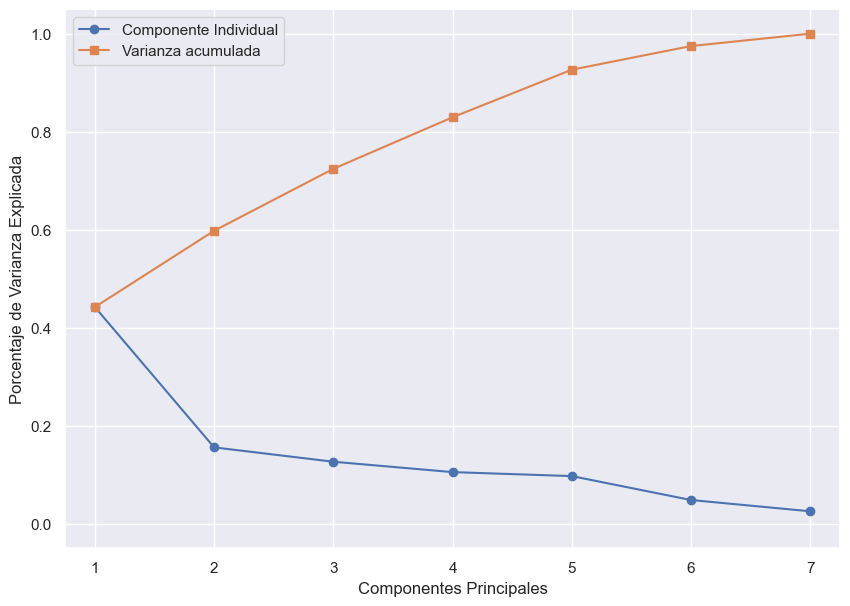

In [88]:
plt.figure(figsize=(10,7))

plt.plot([1,2,3,4,5,6,7], pca_7cp.explained_variance_ratio_, '-o', label="Componente Individual")
plt.plot([1,2,3,4,5,6,7], np.cumsum(pca_7cp.explained_variance_ratio_), '-s', label="Varianza acumulada")

plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.xlim(0.75,7.25)
plt.ylim(-0.05,1.05)
plt.xticks([1,2,3,4,5,6,7])
plt.legend(loc=2);

Para continuar, intentaremos representar las variables latentes asociadas a los componentes principales.

Para ello, primero crearemos un DataFrame con los loadings de cada variable para cada CP:

In [89]:
pca_loadings = pd.DataFrame(pca_4cp.components_.T, index=df_no_categoricas_norm.columns, columns=['PC1','PC2','PC3','PC4'])

pca_loadings

,PC1,PC2,PC3,PC4
screen_size,0.338720,-0.213457,-0.741273,0.305169
rear_camera_mp,0.337474,-0.408511,0.585878,0.195581
front_camera_mp,0.464037,0.183278,0.218450,-0.246686
internal_memory,0.192873,0.718329,0.146841,0.622391
ram,0.378599,-0.090864,0.042526,-0.265350
days_used,-0.352484,-0.410739,0.181524,0.543518
normalized_used_price,0.501267,-0.246990,-0.056738,0.233609


Verificamos la ortonormalidad de los componentes principales:

In [90]:
pca_loadings.T.dot(pca_loadings)

,PC1,PC2,PC3,PC4
PC1,1.000000e+00,3.037057e-16,-2.068147e-16,-1.054351e-16
PC2,3.037057e-16,1.000000e+00,2.480050e-16,-2.038820e-16
PC3,-2.068147e-16,2.480050e-16,1.000000e+00,3.624874e-16
PC4,-1.054351e-16,-2.038820e-16,3.624874e-16,1.000000e+00


Luego, generamos un DataFrame expresando en términos de nuestros componentes principales:

In [91]:
print(df_no_categoricas_norm.index)
df_pca = pd.DataFrame(df_no_categoricas_norm_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'],\
                     index=df_no_categoricas_norm.index)
df_pca.head()

RangeIndex(start=0, stop=3454, step=1)


,PC1,PC2,PC3,PC4
0,0.680438,0.691661,-0.180171,-0.689151
1,3.635129,0.348181,-0.052788,-0.580796
2,3.235752,0.462731,-0.298900,-0.723164
3,3.083565,-0.752893,-2.056726,0.311400
4,0.787989,0.415671,-0.132575,-0.333888


Dado que la información no está agrupada por alguna categoría específica y debido a la cantidad de componentes principales, graficar la relación de variables latentes con los componentes principales no resulta representetativo.

Intentaremos entonces graficar la segmentación que puede hacer cada uno de los componentes de acuerdo al sistema operativo.

In [93]:
import plotly.express as px

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_4cp.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    df_no_categoricas_norm_pca,
    labels=labels,
    dimensions=range(4),
    color=df["os"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

Como observamos en el gráfico anterior, PCA hace una buena agrupación de los distintos sistemas operativos con los componentes PC1 y PC2 y las clases no pueden ser bien separadas con PC3 y PC4.